# Part 9 of Recipes: Transparent Links

This page is primarily based on the following page at the Circos documentation site:



- [9. Transparent Links](????????????)



That page is found as part number 4 of the ??? part ['Recipes' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 8 by clicking [here &#8592;](Recipes_Part8.ipynb).



----



8 --- Recipes
=============

9. Transparent Links
--------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/recipes/transparent_links/lesson){.clean}]{.active}
[Images](/documentation/tutorials/recipes/transparent_links/images){.normal}
[Configuration](/documentation/tutorials/recipes/transparent_links/configuration){.normal}
:::

This tutorial shows how you can improve the layout of your links using
color transparency. The data for this tutorial was created using
tools/randomlinks. This script generates random links between
chromosomes based on your karyotype file and a flexible configuration
which controls how many links to create, how large their spans should
be, and so on. The configuration file, randomlinks.conf, can be found in
this tutorial\'s directory.

### using z-depth

If you have many ribbon links that overlap, one way to bring important
(e.g. large) links to the foreground is to use z-depth.

This rule will set the z-depth for each link independently, as a
function of its size. Larger links (i.e. those with large start/end
spans) will have a high z-depth and therefore be shown on top.

```ini
<rules>
<rule>
condition  = 1
z          = eval( scalar min(var(size1),var(size2) ) )
</rule>
</rules>
```


The problem of link occlusion still remains---if you have a lot of links
you won\'t be able to see them all.

### defining transparent colors

To define a transparent color, add a fourth value to its RGB triplet.
This value will be the transparency and it is a number between 0
(opaque) and 127 (fully transparent). For example, in addition to the
default colors, I add a transparent black

```ini
<<include colors_fonts_patterns.conf>>
<colors>
blackweak = 0,0,0,100
</colors>
```


The transparency is 100/127, which gives blackweak an RGB value of
200,200,200 when drawn on white. When links are assigned this color,

```ini
<link>
ribbon = yes
color  = blackweak
...
</link>
```


the ribbons are drawn with transparency.

The blackweak color is black with 79% transparency. The alpha blending
in GD results in multiplication of overlapping RGB colors. Thus, for
every overlapping ribbon the RGB values are scaled from 200,200,200 by
79% (two overlapping ribbons result in 157,157,157, three in
123,123,123, and so on).

### automatic definition of colors with transparency

By default, Circos defines 5 levels of transparency for each color you
define.

Each color (e.g. pure red, `pred=255,0,0`) will yield 5 new color
definitions `pred_a1`, `pred_a2`, `pred_a3`, `pred_a4`, and `pred_a5`
with each `_aN` color having a transparency `N/(5+1`). Thus `pred_a1`
will have a 17% transparency, `pred_a2` 33%, `pred_a3` 50%, `pred_a4`
67% and `pred_a5` 83%.

Note that `pred_a0` is not defined (you already have it in `pred`) and
`pred_a5` is not 100% transparent.

With the automatic allocation of these colors, you can immediately use
them

```ini
<link>
ribbon = yes
color  = black_a5 # black with 83% transparency
...
</link>
```


You can change the number of transparency steps using `auto_alpha_steps`
in the [\<image\>]{.syn-block} block.

```ini
<image>
<<include etc/image.conf>>
# overwrite auto_alpha_steps from default value included in etc/image.conf
auto_alpha_steps* = 10
</image>
```


### adding transparency with rules

You can easily make elements that use opaque colors (e.g. `red`) to use
transparent versions (e.g. `red_a5`) by writing rules to rewrite the
color value.

For this example, I generated random links across all chromosomes in the
human genome.

```ini
e.g.
hs7 127586339 141410899 hsY 30737607 31414129
```


The rule below assigns each link a color derived from three components:
luminance prefix, chromosome name and transparency suffix.

```ini
<rule>
condition = 1
# derive the color name from the chromosome name
# lum80 + chr_name + _a2
#
# lum70*, lum80* and lum90* colors are normalized
# to a given luminance and are predefined at etc/colors.ucsc.conf
#
# _a2 adds transparency (2/6 = 33%) where the denominator
# is derived from auto_alpha_steps+1=6
color     = eval(lc sprintf("%s%s_a%d",'conf(luminance)',var(chr1),4))
</rule>
```


With this rule, all links color names are modified (e.g. `hs7` to
`lum80hs7_a4`) and shown at 67% transparency (default value of
`auto_alpha_steps=5`). The `lum80` prefix is referenced using the
`conf()` function which accesses the value of the parameter `luminance`.
This parameter is conveniently defined at the top of the configuration
file. You can alter it at the command line using `-param` flag

```ini
> circos -param luminance=lum70
```


The images for this tutorial show links (i) without transparency, (ii)
with transparency (`_a4`) and (iii) with additional luminance
normalization (`lum80`), where the chromosome colors also have this
luminance normalization.

### coloring chromosomes

The definition below derives the chromosome color from its name and the
`luminance` prefix

```ini
# change the color of each chromosome to lum80 + chr_name
# where the lum80 prefix references a predefined color
# with normalized luminance
chromosomes_color = /./=conf(luminance)var(chr)
```


### transparency in bitmaps vs svg

Transparency in SVG for outlines is not available.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/8/9/

/home/jovyan/circos-tutorials-0.67/tutorials/8/9


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.34s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.35s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/8/9
debuggroup summary 0.35s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.35s loading configuration from file circos.conf
debuggroup summary 0.35s found conf file circos.conf
debuggroup summary 0.52s debug will appear for these features: output,summary
debuggroup summary 0.52s bitmap output image ./circos.png
debuggroup summary 0.52s SVG output image ./circos.svg
debuggroup summary 0.52s parsing karyotype and organizing ideograms
debuggroup summary 0.62s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.63s applying global and local scaling
debuggroup summary 0.64s allocating image, colors and brushes
debuggroup summary 2.67s drawing 24 ideograms of total size 3,095,677,436
debuggroup summary 2.67s drawing highlights and ideograms
debuggroup summ

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

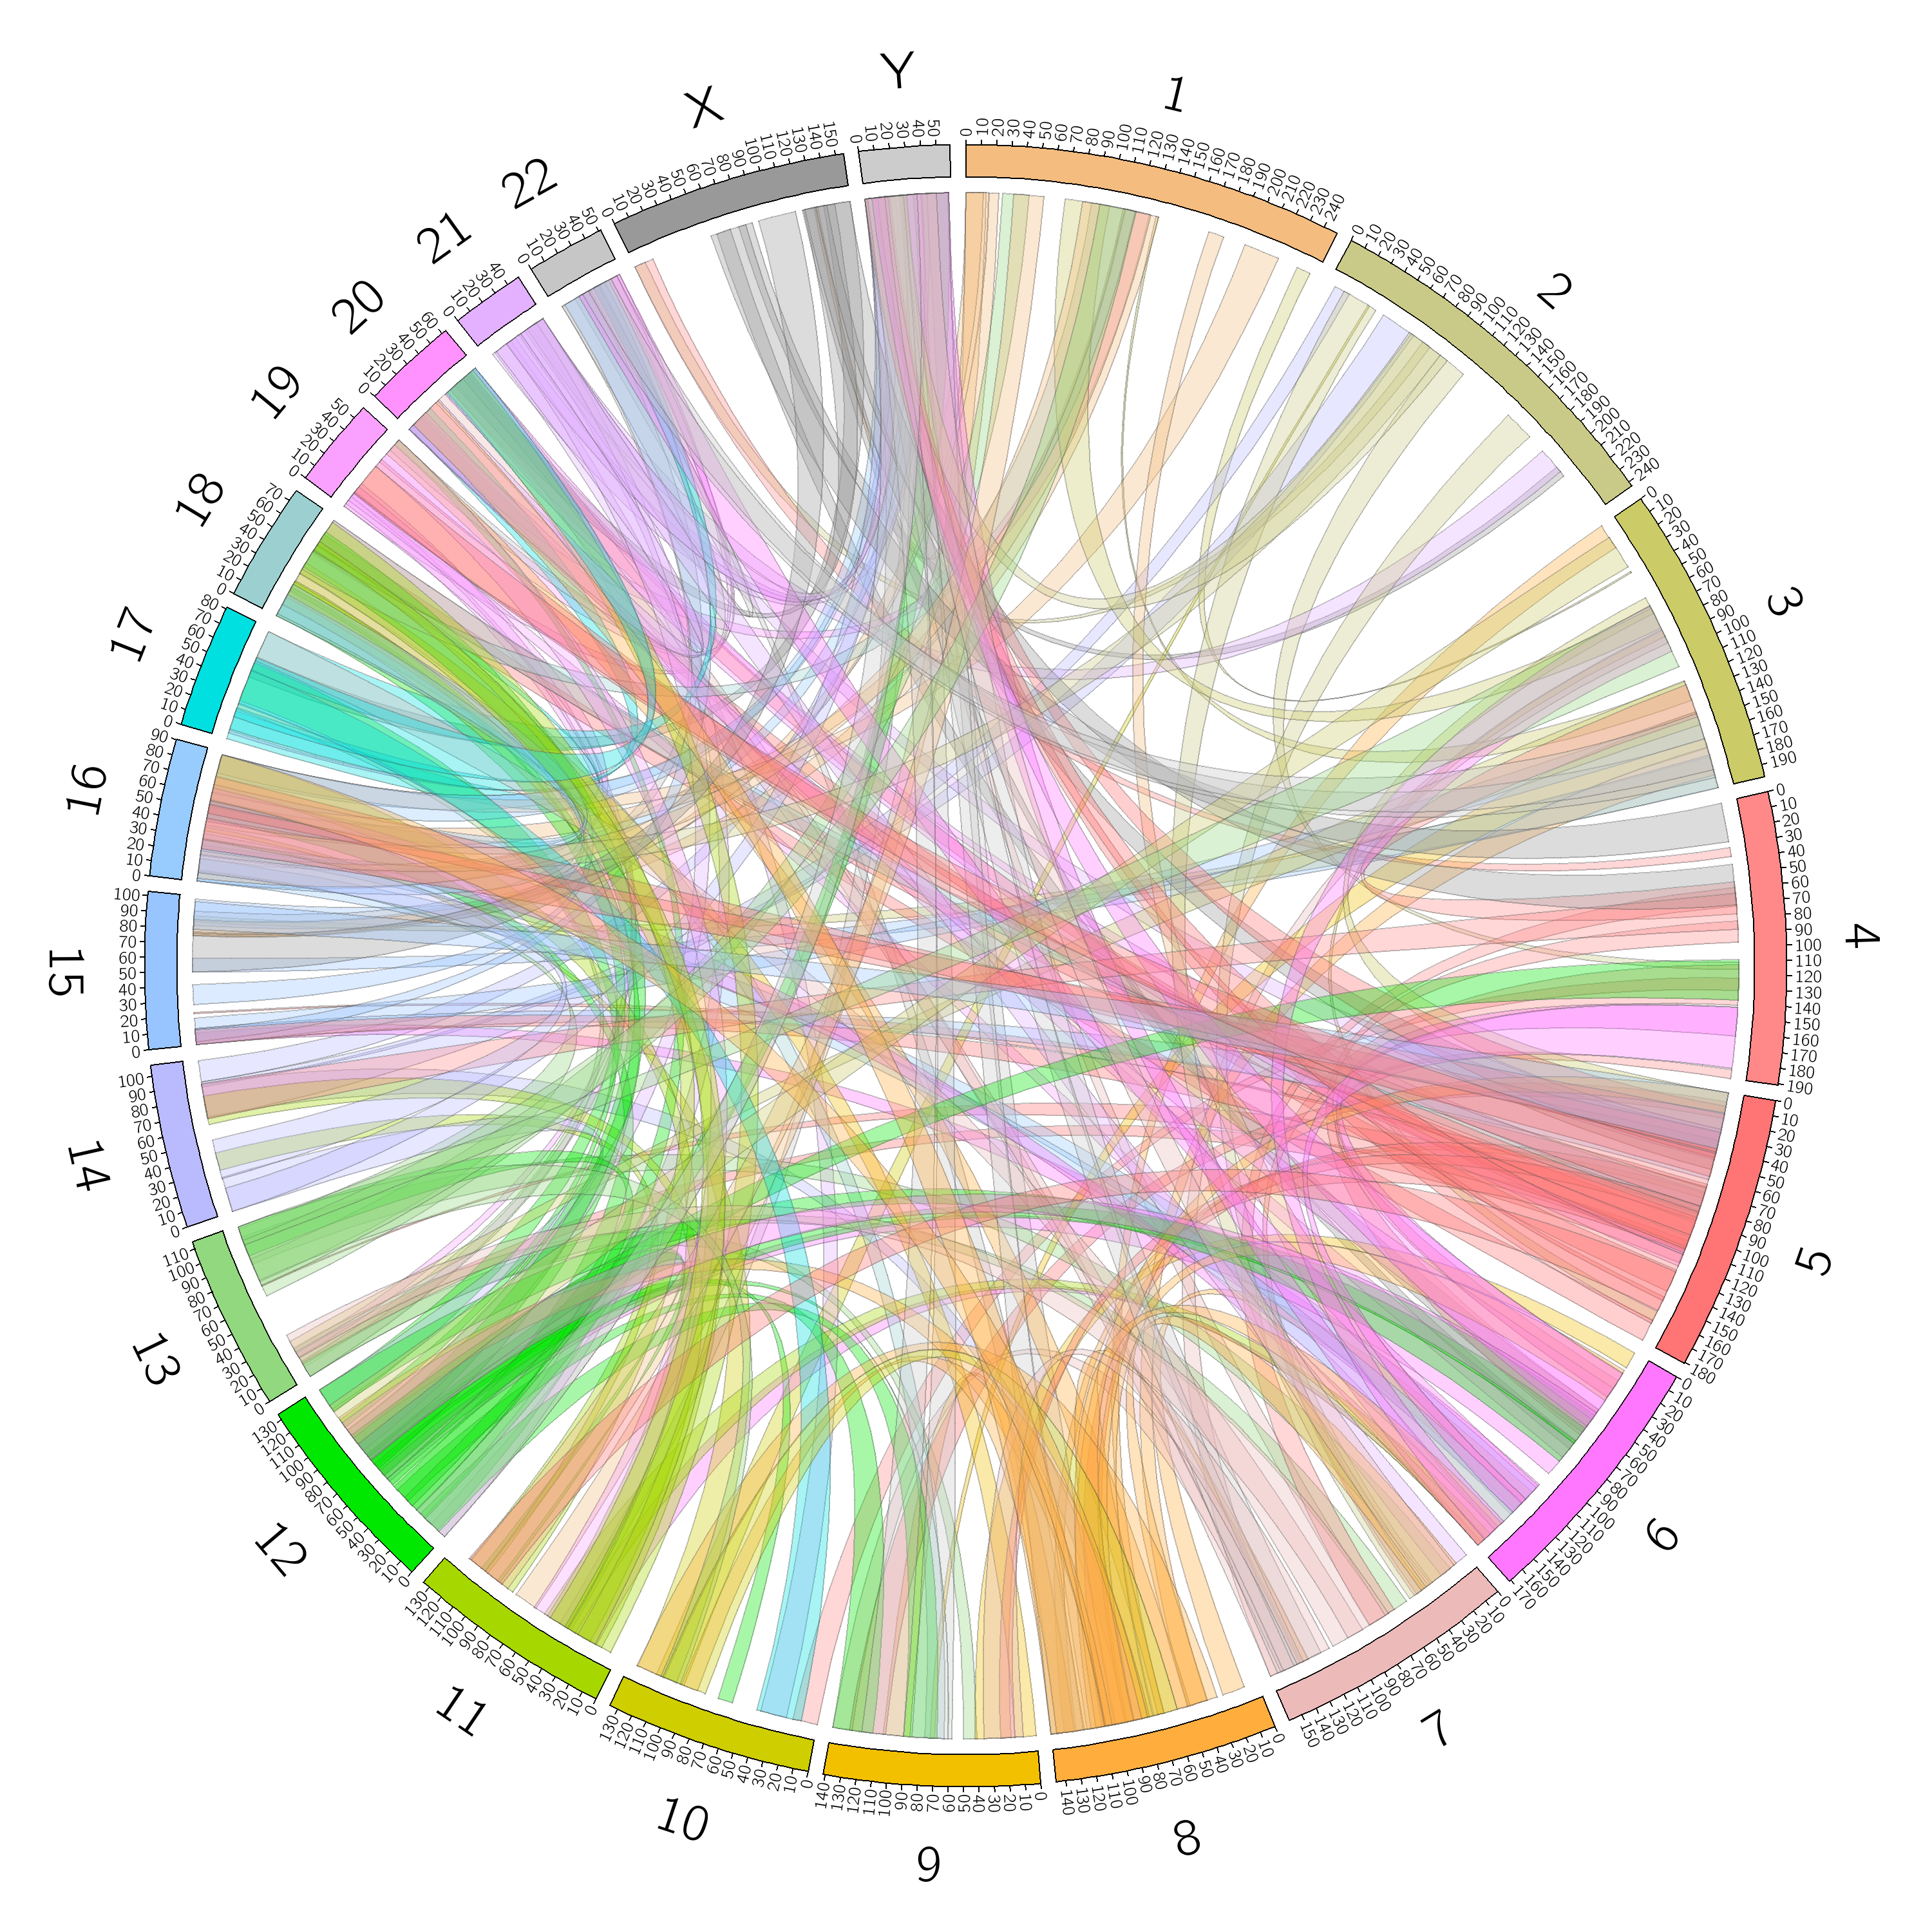

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Recipes series by clicking [here &#10145;](Recipes_Part10.ipynb).

----